In [1]:
%matplotlib inline
import json
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
tweet_place = []
with open("place.txt",'r') as f:
    for line in f:
        try:
            l = f.readline()
            tweet_place.append(json.loads(l))
        except:
            continue

In [4]:
# Place data is only available when user enables its location.
# Out of around 2.5 lakh tweets only 1858 tweets have loaction data. 

len(tweet_place)

1858

In [5]:
print(tweet_place[0])

{'full_name': 'Punjab, Pakistan', 'country_code': 'PK', 'place_type': 'admin', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[69.328873, 27.708226], [75.382124, 27.708226], [75.382124, 34.019989], [69.328873, 34.019989]]]}, 'name': 'Punjab', 'attributes': {}, 'contained_within': [], 'id': '00cc0d5640394308', 'url': 'https://api.twitter.com/1.1/geo/id/00cc0d5640394308.json', 'country': 'Pakistan'}


In [9]:
# Keys of place 
tweet_place[0].keys()

dict_keys(['full_name', 'country_code', 'place_type', 'bounding_box', 'name', 'attributes', 'contained_within', 'id', 'url', 'country'])

In [10]:
tweet_place[1]

{'attributes': {},
 'bounding_box': {'coordinates': [[[77.20469, 28.620877],
    [77.641989, 28.620877],
    [77.641989, 28.926259],
    [77.20469, 28.926259]]],
  'type': 'Polygon'},
 'contained_within': [],
 'country': 'India',
 'country_code': 'IN',
 'full_name': 'Ghaziabad, India',
 'id': '4d51b7ea67b6f64b',
 'name': 'Ghaziabad',
 'place_type': 'city',
 'url': 'https://api.twitter.com/1.1/geo/id/4d51b7ea67b6f64b.json'}

In [11]:
# We need coordinates to plot on map.
# Since tweeter provide location coordinates as a polygon that means it doesn't provide the exact location.
# Location of user can be anywher inside the polygon(I am not sure about this,just making assumption based).

tweet_place[0]['bounding_box']['coordinates']

[[[69.328873, 27.708226],
  [75.382124, 27.708226],
  [75.382124, 34.019989],
  [69.328873, 34.019989]]]

In [13]:
# Saving latitude and longitude in separate variables.

latitude = []
for t in range(len(tweet_place)):
    sum = 0
    for i in range(4):
        sum += tweet_place[t]['bounding_box']['coordinates'][0][i][0]
    latitude.append("{0:.5f}".format(sum/4))
    
    
longitude = []
for t in range(len(tweet_place)):
    sum = 0
    for i in range(4):
        sum += tweet_place[t]['bounding_box']['coordinates'][0][i][1]
    longitude.append("{0:.5f}".format(sum/4))

In [14]:
# Converting to float since the basemap requried arguments in float

lat = [float (i) for i in latitude ]
lon = [float (i) for i in longitude]
type(lat[0])

float

<IPython.core.display.Javascript object>


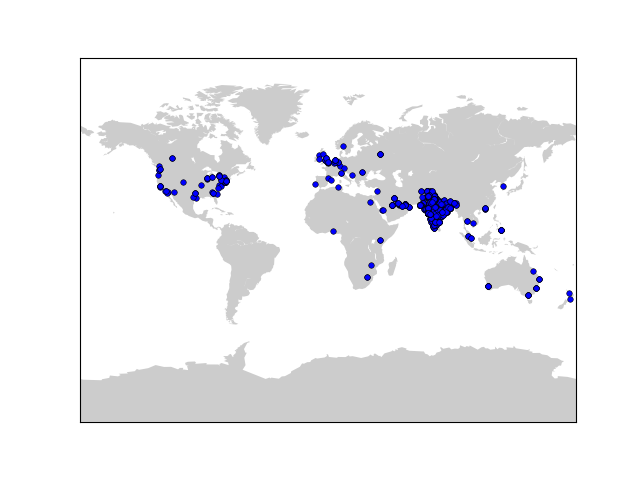

In [15]:
# Plotting latitude and longitude on map using Basemap
%matplotlib nbagg
my_map = Basemap(projection= 'mill',lat_0 = 0, lon_0 = 0)
my_map.fillcontinents()
x,y = my_map(lat,lon)
my_map.plot(x,y,'bo',markersize=5)
plt.show()